IMPORT NECCESARY PACKAGES

In [73]:
from PIL import Image
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

MANUALY SELECT THE PIXEL COORDINATES OF RIVER AND NON RIVER REGION 

In [74]:
Xcord_Riv=[146, 151, 158, 152, 159, 165, 158, 165, 170, 172, 169, 177, 180, 178, 179, 171, 159, 165, 165, 171, 180, 177, 194, 199, 202, 211, 221, 227, 224, 215, 206, 198, 190, 186, 188, 188, 181, 181, 175, 166, 155, 148, 144, 141, 155, 165, 162, 171, 203, 195]

Ycord_Riv=[9, 9, 13, 22, 26, 31, 45, 44, 45, 56, 67, 69, 83, 97, 119, 140, 160, 167, 191, 209, 218, 228, 247, 256, 271, 280, 294, 311, 339, 349, 352, 361, 376, 383, 399, 407, 424, 436, 452, 468, 485, 497, 504, 505, 493, 481, 475, 466, 352, 364]

Xcord_NonRiv=[16, 58, 109, 128, 137, 78, 48, 30, 21, 75, 137, 142, 143, 84, 45, 21, 36, 131, 170, 180, 150, 121, 14, 38, 43, 98, 208, 291, 318, 399, 454, 480, 373, 275, 257, 277, 349, 430, 456, 367, 324, 257, 218, 243, 356, 442, 471, 463, 391, 294, 217, 223, 302, 407, 450, 441, 344, 319, 332, 416, 438, 366, 310, 292, 264, 294, 84, 138, 152, 135, 87, 50, 51, 102, 123, 62, 39, 77, 113, 112, 48, 44, 54, 120, 252, 260, 365, 418, 386, 440, 487, 476, 404, 403, 453, 492, 343, 335, 400, 458]

Ycord_NonRiv=[8, 10, 13, 24, 68, 56, 68, 85, 124, 124, 128, 135, 174, 184, 200, 234, 263, 270, 283, 326, 364, 333, 338, 416, 467, 461, 474, 476, 480, 472, 438, 392, 399, 428, 394, 331, 331, 314, 260, 252, 262, 223, 194, 160, 170, 170, 102, 68, 62, 95, 57, 27, 25, 27, 69, 165, 133, 189, 256, 329, 397, 446, 446, 425, 364, 300, 276, 307, 353, 427, 453, 433, 357, 306, 276, 273, 242, 191, 165, 120, 118, 76, 38, 35, 59, 27, 28, 26, 42, 76, 67, 126, 146, 195, 231, 276, 301, 307, 352, 356]


OPEN REQUIRED IMAGES USING Image.open FUNCTION

In [75]:
im = Image.open("band1.gif") 
im2= Image.open("band2.gif") 
im3= Image.open("band3.gif") 
im4= Image.open("band4.gif") 

In [76]:
riv_len=len(Xcord_Riv)
nriv_len=len(Xcord_NonRiv)

CREATE RIVER CLASS DATAFRAME ( CONTAINING PIXEL VALUES OF CHOOSEN PIXEL LOCATIONS FOR EACH IMAGES) USING getpixel() FUNCTION

In [77]:
band1_R=[]
band2_R=[]
band3_R=[]
band4_R=[]
for i in range(riv_len):
    cordinate=x,y=Xcord_Riv[i],Ycord_Riv[i]
    band1_R.append(im.getpixel(cordinate))
    band2_R.append(im2.getpixel(cordinate))
    band3_R.append(im3.getpixel(cordinate))
    band4_R.append(im4.getpixel(cordinate))
River_class=pd.DataFrame([band1_R,band2_R,band3_R,band4_R], index=["band1","band2","band3","band4"]).T

In [78]:
mean_R=River_class.mean()
mean_R

band1    12.12
band2    14.04
band3    17.26
band4     7.08
dtype: float64

In [79]:
cov_R=River_class.cov()
cov_R

,band1,band2,band3,band4
band1,1.046531,0.709388,0.682449,0.051429
band2,0.709388,0.896327,0.683265,-0.105306
band3,0.682449,0.683265,0.808571,-0.082449
band4,0.051429,-0.105306,-0.082449,1.095510


In [ ]:
CREATE NON RIVER CLASS DATAFRAME ( CONTAINING PIXEL VALUES OF CHOOSEN PIXEL LOCATIONS FOR EACH IMAGES) USING getpixel() FUNCTION

In [80]:
band1_NR=[]
band2_NR=[]
band3_NR=[]
band4_NR=[]
for i in range(nriv_len):
    cordinate=x,y=Xcord_NonRiv[i],Xcord_NonRiv[i]
    band1_NR.append(im.getpixel(cordinate))
    band2_NR.append(im2.getpixel(cordinate))
    band3_NR.append(im3.getpixel(cordinate))
    band4_NR.append(im4.getpixel(cordinate))
NRiver_class=pd.DataFrame([band1_NR,band2_NR,band3_NR,band4_NR], index=["band1","band2","band3","band4"]).T

In [81]:
mean_NR=NRiver_class.mean()
mean_NR

band1     8.72
band2     9.61
band3    12.06
band4    19.39
dtype: float64

In [82]:
cov_NR=NRiver_class.cov()
cov_NR

,band1,band2,band3,band4
band1,8.446061,7.556364,12.289697,10.413333
band2,7.556364,7.553434,11.963030,10.790000
band3,12.289697,11.963030,22.703434,19.279394
band4,10.413333,10.790000,19.279394,51.391818


CREATE TEST DATA(CONTAINING ALL PIXEL VALUES OF EACH IMAGE)

In [83]:
test_data=[]
t=[]
for i in range(512):
    for j in range(512):
        cordinate=x,y=i,j
        x=[im.getpixel(cordinate),im2.getpixel(cordinate),im3.getpixel(cordinate),im4.getpixel(cordinate)]
        test_data.append(x)
test_data=pd.DataFrame(test_data).T
band=["band1","band2","band3","band4"]
test_data.index=band

In [85]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
band1,9,9,9,9,9,7,5,4,8,9,...,7,7,7,6,6,6,5,5,5,5
band2,11,10,10,11,10,8,6,6,8,10,...,8,8,8,7,7,7,7,7,6,6
band3,12,12,12,13,11,9,7,6,8,12,...,6,6,5,5,5,6,7,7,7,6
band4,28,29,29,28,30,28,24,17,23,25,...,13,27,43,24,16,15,12,10,8,8


In [86]:
def calcuDiff(data1,data2):
    length=len(data1)
    t=[]
    for i in range(length):
        t.append(data1[i]-data2[i])
    return t

GENERATE DENSITY

In [88]:
def generateDensity(cov,cl):
    temp1=np.sqrt(np.linalg.det(cov_R))
    temp2=np.exp(cl)
    temp3=1/temp1
    t=-(0.5)*temp3*temp2
    return t    

CREATE CLASS 

In [89]:
def createClass(test_data,mean,cov):
    t=calcuDiff(test_data,mean)
    t=np.array(t)       
    inv=np.linalg.inv(cov_NR)
    t2=t.T
    temp1=np.matmul(t,inv)
    C=np.matmul(temp1,t2)
    return C

PLOTING IMAGE FROM PIXEL VALUES USING IMSHOW

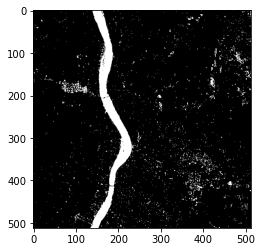

In [90]:
Out_image=[]
for i in range(512*512):
    P1=0.3
    P2=0.7
    R_C=createClass(test_data[i],mean_R,cov_R)
    NR_C=createClass(test_data[i],mean_NR,cov_NR)
    p1=generateDensity(cov_R,R_C)
    p2=generateDensity(cov_NR,NR_C)
    if (P1 * p1) >= (P2 * p2):
        Out_image.append(255)
    else:
        Out_image.append(0)

plt.imshow(np.array(Out_image).reshape(512,512).T, cmap = plt.get_cmap(name = 'gray'))

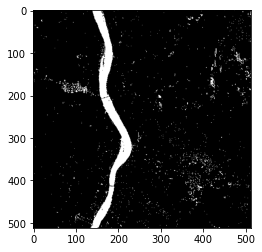

In [92]:
Out_image=[]
for i in range(512*512):
    P1=0.7
    P2=0.3
    R_C=createClass(test_data[i],mean_R,cov_R)
    NR_C=createClass(test_data[i],mean_NR,cov_NR)
    p1=generateDensity(cov_R,R_C)
    p2=generateDensity(cov_NR,NR_C)
    if (P1 * p1) >= (P2 * p2):
        Out_image.append(255)
    else:
        Out_image.append(0)
plt.imshow(np.array(Out_image).reshape(512,512).T, cmap = plt.get_cmap(name = 'gray'))

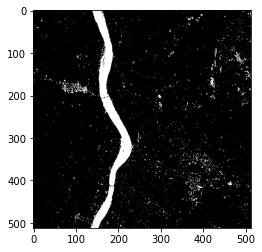

In [93]:
Out_image=[]
for i in range(512*512):
    P1=0.5
    P2=0.5
    R_C=createClass(test_data[i],mean_R,cov_R)
    NR_C=createClass(test_data[i],mean_NR,cov_NR)
    p1=generateDensity(cov_R,R_C)
    p2=generateDensity(cov_NR,NR_C)
    if (P1 * p1) >= (P2 * p2):
        Out_image.append(255)
    else:
        Out_image.append(0)
plt.imshow(np.array(Out_image).reshape(512,512).T, cmap = plt.get_cmap(name = 'gray'))